In [4]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pfile_r =  '../test/mat00_sat_pairs.npz'
pfile_rn = '../test/mat00_nex_pairs.npz'
pfile_nn = '../test/mat00_nn_pairs.npz'

date_begin = datetime(2007, 1, 1)
date_end = datetime(2007, 1, 5)


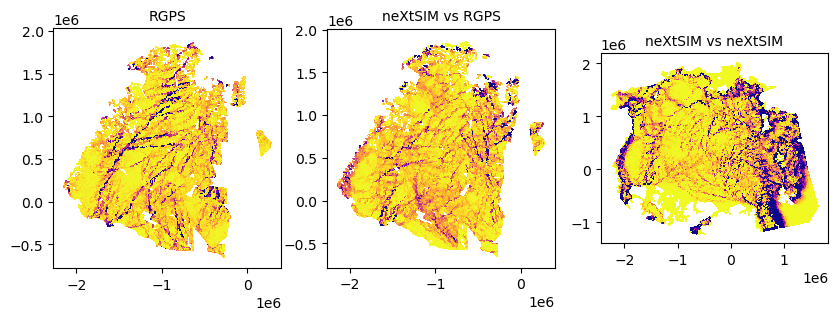

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

for i, pfile in enumerate([pfile_r, pfile_rn, pfile_nn]):
    with np.load(pfile, allow_pickle=True) as f:
        pairs = f['pairs']
    dfile = pfile.replace('_pairs.npz', '_defor.npz')
    with np.load(dfile, allow_pickle=True) as f:
        defor = f['defor']

    for p, d in zip(pairs, defor):
        if date_begin <= p.d0 <= date_end:
            axs[i].tripcolor(p.x0, p.y0, p.t, d.e2 * 24 * 60 * 60, mask=~p.g, cmap='plasma_r', vmin=0, vmax=0.1)
    for ax in axs:
        ax.set_aspect('equal')

axs[0].set_title('RGPS', fontsize=10)
axs[1].set_title('neXtSIM vs RGPS', fontsize=10)
axs[2].set_title('neXtSIM vs neXtSIM', fontsize=10)

plt.show()